In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.coordinates import SkyCoord

from dsavim.astrometry import *

In [2]:
imagedir = Path("/media/ubuntu/data/dsa110/imaging/")
image_name = "2022-02-07_220207aabh"

In [3]:
vlass = VLASSCat()
dsaimage = Image(imagedir/f"{image_name}-image.fits")

In [4]:
vlass_sources = vlass.search(dsaimage.centre, halfwidth=dsaimage.radius, min_flux=0.005)
dsa_sources = dsaimage.sources

In [5]:
vlass_coords = SkyCoord(vlass_sources['RA']*u.deg, vlass_sources['DEC']*u.deg)
dsa_coords = SkyCoord(dsa_sources['RA']*u.deg, dsa_sources['DEC']*u.deg)

(<Figure size 1152x1152 with 1 Axes>,
 <matplotlib.axes._subplots.WCSAxesSubplot at 0x7f12980ee710>)

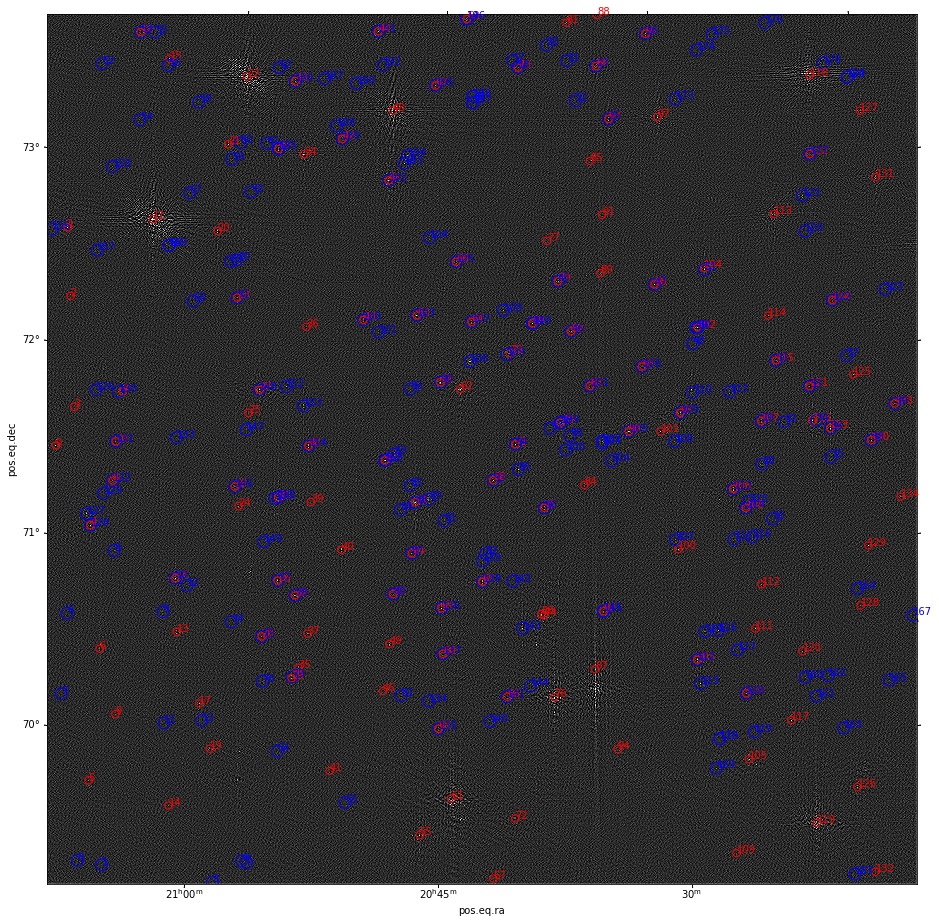

In [6]:
plot_catalogs(dsaimage, [(dsa_coords, 35, 'red'), (vlass_coords, 55, 'blue')])

Text(0.5,0,'2D separation between DSA-110 and VLASS match, arcsecond')

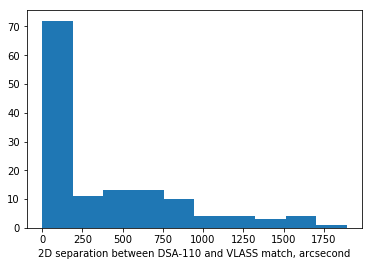

In [7]:
matched_sources = match_catalogs(dsa_sources, vlass_sources)
plt.hist(matched_sources['sep2d_asec'])
plt.xlabel('2D separation between DSA-110 and VLASS match, arcsecond')

Text(0.5,0,'2D separation between DSA-110 and VLASS match, arcsecond')

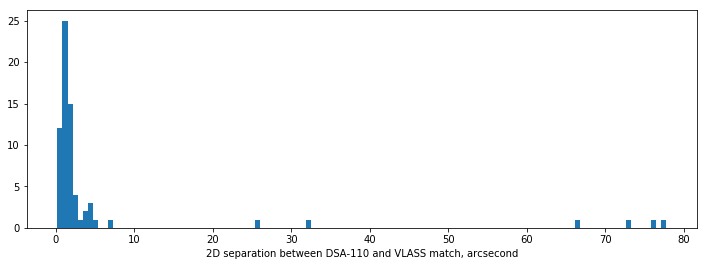

In [8]:
matched_sources = matched_sources[matched_sources['sep2d_asec'] < 120]
fig = plt.figure(figsize=(12, 4))
_ = plt.hist(matched_sources['sep2d_asec'], bins=120)
plt.xlabel('2D separation between DSA-110 and VLASS match, arcsecond')

In [9]:
matched_sources = matched_sources[matched_sources['sep2d_asec'] < 10]
print(
    f"For {len(matched_sources)} sources:\n"
    f"RA offset: {matched_sources['ra_offset_asec'].mean():0.2f} pm {matched_sources['ra_offset_asec'].std():0.2f}\n"
    f"DEC offset: {matched_sources['dec_offset_asec'].mean():0.2f} pm {matched_sources['dec_offset_asec'].std():0.2f}")

For 64 sources:
RA offset: -0.36 pm 1.29
DEC offset: -1.11 pm 1.10


In [10]:
matched_sources = matched_sources[matched_sources['ref_code'] == 'S']
print(
    f"For {len(matched_sources)} sources:\n"
    f"RA offset: {matched_sources['ra_offset_asec'].mean():0.2f} pm {matched_sources['ra_offset_asec'].std():0.2f}\n"
    f"DEC offset: {matched_sources['dec_offset_asec'].mean():0.2f} pm {matched_sources['dec_offset_asec'].std():0.2f}")

For 36 sources:
RA offset: -0.35 pm 0.93
DEC offset: -1.09 pm 0.82


(<Figure size 1152x1152 with 1 Axes>,
 <matplotlib.axes._subplots.WCSAxesSubplot at 0x7f129d0a9550>)

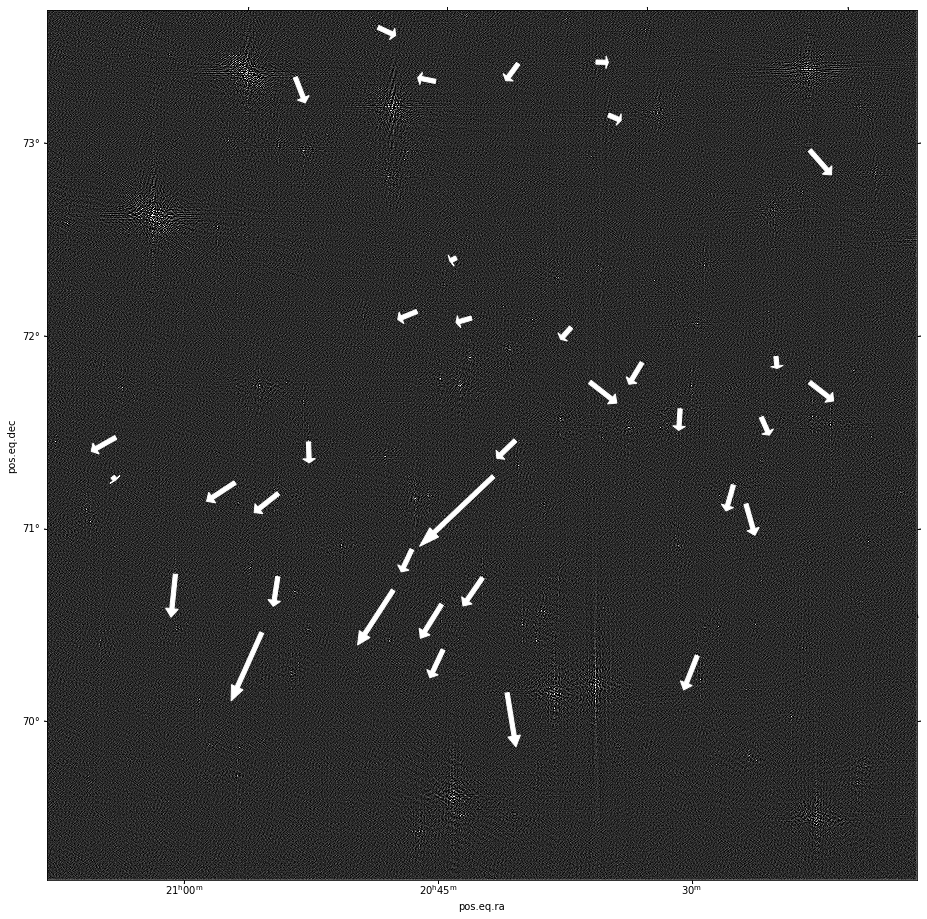

In [11]:
plot_offset_direction(
    dsaimage, vlass_coords[matched_sources['ref_id']],
    matched_sources['ra_offset_asec'], matched_sources['dec_offset_asec'])

(<Figure size 1152x1152 with 1 Axes>,
 <matplotlib.axes._subplots.WCSAxesSubplot at 0x7f129cae7e80>)

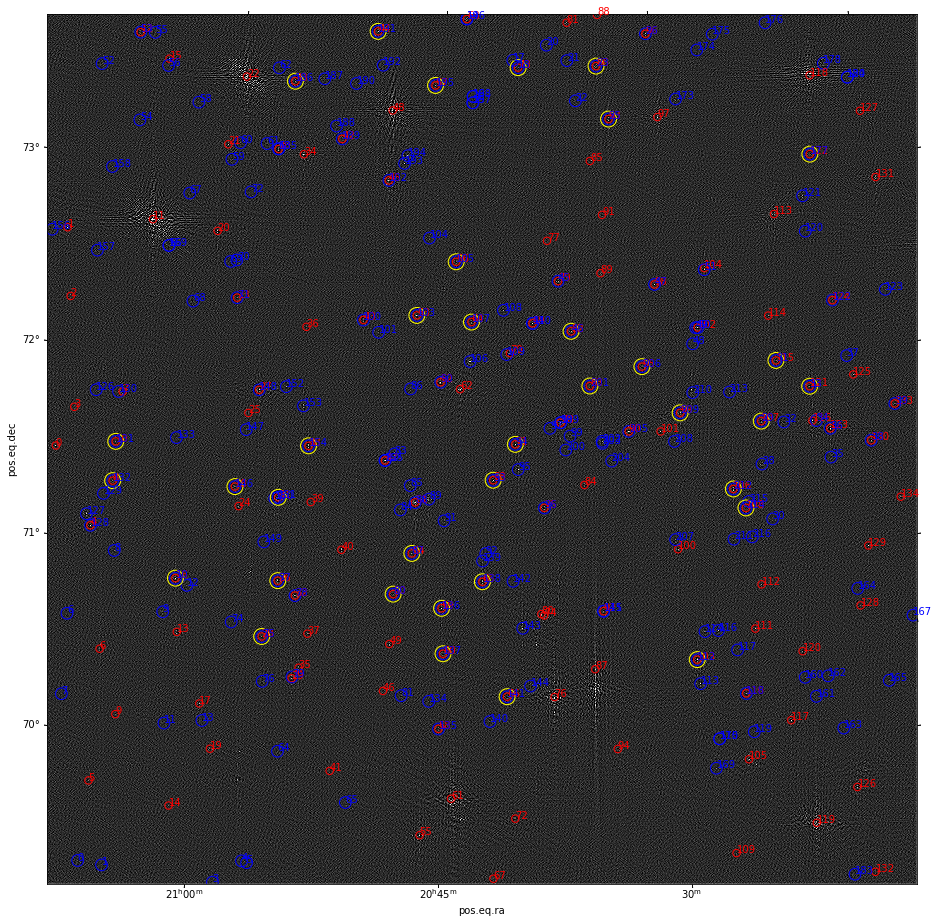

In [12]:
plot_matched_sources(dsaimage, [(dsa_coords, 35, 'red'), (vlass_coords, 55, 'blue')], matched_sources.index)

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f12981ffcc0>)

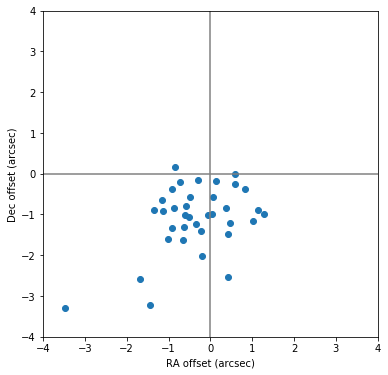

In [13]:
plot_offsets(matched_sources['ra_offset_asec'], matched_sources['dec_offset_asec'])

In [14]:
catout = dsa_sources.iloc[matched_sources.index].reset_index(drop=True)
catout.to_csv(f"{burst_name}_matched_vlass.csv")